In [1]:

import argparse
import cv2
import numpy as np
import os
from sklearn.utils import shuffle
from tqdm import tqdm
class_dirs = os.listdir("DataSet")
class_dirs.sort()
print(class_dirs)
import numpy as np
hinge_feature_vectors = []
cold_feature_vectors = []
labels = []
label_names = []
ecount = 0
input_folder="DataSet"
imgs=[]
# cold = Cold()
# hinge = Hinge()
for i, class_dir in enumerate(class_dirs):
    img_filenames = os.listdir(os.path.join(input_folder, class_dir))
    
    for img_filename in tqdm(img_filenames):
        
            img_path = os.path.join(input_folder, class_dir, img_filename)
            
            
            
            imgs.append(cv2.imread("Dataset/"+class_dir+'/'+img_filename))
            
            label_names.append(class_dir)
            labels.append(i)

greyimgs=[]
print("------------------------------")
m=100000000000
minidx=0
k=0
for i in imgs:
     
    if i.shape[0]*i.shape[1]<m:
        m=i.shape[0]*i.shape[1]
        minidx= k
    k=k+1

print(imgs[minidx].shape)
     
print("------------------------------")
resizedimgs=[]
for i in imgs:
   resizedimgs.append( cv2.resize(i, (370,370)))

print("wdwdc")
print(resizedimgs[11].shape)

for i in resizedimgs:
      greyimgs.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))


resizedimgs, label_names = shuffle(resizedimgs, label_names)


    






['next', 'pause', 'pre', 'voldown', 'volup']


100%|██████████| 116/116 [00:09<00:00, 12.31it/s]


------------------------------
(372, 372, 3)
------------------------------
wdwdc
(370, 370, 3)


In [2]:

class_dirs = os.listdir("test")
class_dirs.sort()
print(class_dirs)
testlabels = []
testlabel_names = []
ecount = 0
input_folder="test"
tstimgs=[]
# cold = Cold()
# hinge = Hinge()
for i, class_dir in enumerate(class_dirs):
    img_filenames = os.listdir(os.path.join(input_folder, class_dir))
    
    for img_filename in tqdm(img_filenames):
        
            img_path = os.path.join(input_folder, class_dir, img_filename)
            
            
            
            tstimgs.append(cv2.imread("test/"+class_dir+'/'+img_filename))
            
            testlabel_names.append(class_dir)
            testlabels.append(i)
    

['next', 'pause', 'pre', 'voldown', 'volup']


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [3]:
tstresizedimgs=[]
for i in tstimgs:
   tstresizedimgs.append( cv2.resize(i, (370,370)))

In [4]:
resizedimgs, label_names = shuffle(resizedimgs, label_names)
print(label_names[0:10])

# tstresizedimgs, testlabel_names = shuffle(tstresizedimgs, testlabel_names)
# print(testlabel_names[0:10])

['pre', 'pause', 'next', 'voldown', 'pre', 'voldown', 'pre', 'next', 'volup', 'voldown']


In [5]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

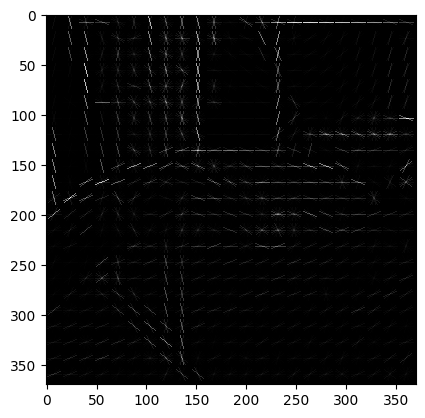

In [6]:
hog_features=[]
hog_images=[]

for i in greyimgs:
    hog_features .append(hog(i,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))[0])
    hog_images .append (hog(i,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))[1])


 
plt.imshow(hog_images[22], cmap=mpl.cm.gray)

In [7]:
def create_features(img):
    # flatten three channel color image
    
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2gray(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack((hog_features))
    return flat_features
bombus_features = create_features(resizedimgs[0])
print(bombus_features)

[0.54096914 0.00877263 0.0096713  ... 0.00261171 0.00452564 0.00254156]


In [8]:
def create_feature_matrix(imgs):
    features_list = []
    
    for img_id in imgs:
        # load image
        
        # get features for image
        image_features = create_features(img_id)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(resizedimgs)
print(feature_matrix.shape)

(601, 35721)


In [9]:
# tstfeature_matrix = create_feature_matrix(tstresizedimgs)
# print(tstfeature_matrix.shape)

In [9]:
# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
bees_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
bees_pca = ss.fit_transform(bees_stand)
# look at new shape
print('PCA matrix shape is: ', bees_pca.shape)

PCA matrix shape is:  (601, 35721)


In [11]:
# ss = StandardScaler()
# # run this on our feature matrix
# tstbees_stand = ss.fit_transform(tstfeature_matrix)

# tstpca = PCA(n_components=500)
# # use fit_transform to run PCA on our standardized matrix
# tstbees_pca = ss.fit_transform(tstbees_stand)
# # look at new shape
# print('PCA matrix shape is: ', tstbees_pca.shape)

In [17]:
X = pd.DataFrame(bees_pca)
y = pd.Series(label_names)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=12345)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

pause      117
pre        105
voldown     91
volup       88
next        79
dtype: int64

In [13]:
# X = pd.DataFrame(tstbees_pca)
# y = pd.Series(testlabel_names)
# print(len(X))
# print(len(y))

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.9,
#                                                     random_state=1234123)

# # look at the distrubution of labels in the train set
# pd.Series(y_test).value_counts()

In [18]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [19]:
from sklearn.metrics import classification_report
print(len(X_test))
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))

121
Model accuracy is:  0.8512396694214877
              precision    recall  f1-score   support

        next       0.94      0.85      0.89        20
       pause       0.82      0.94      0.88        34
         pre       0.88      0.71      0.79        21
     voldown       0.81      0.94      0.87        18
       volup       0.85      0.79      0.81        28

    accuracy                           0.85       121
   macro avg       0.86      0.85      0.85       121
weighted avg       0.86      0.85      0.85       121



In [21]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [44]:
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()
classifier.fit(X_train, y_train)


res=classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8842975206611571


c:\Users\Mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import classification_report


print(classification_report(y_test,res))

              precision    recall  f1-score   support

        next       0.79      0.94      0.86        16
       pause       0.93      0.90      0.91        41
         pre       0.79      0.90      0.84        21
     voldown       0.90      0.86      0.88        21
       volup       0.89      0.73      0.80        22

    accuracy                           0.87       121
   macro avg       0.86      0.87      0.86       121
weighted avg       0.87      0.87      0.87       121



In [46]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7025


In [ ]:
# from sklearn.model_selection import GridSearchCV


# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=SVC(probability=True,C=10,gamma=0.0001,kernel='rbf')
# print("The training of the model is started, please wait for while as it may take few minutes to complete")
# model=GridSearchCV(svc,param_grid)
# model.fit(X_train,y_train)
# print('The Model is trained well with the given images')
# model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


KeyboardInterrupt: 

In [ ]:
# from sklearn.model_selection import GridSearchCV


# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
# svc=SVC(probability=True,C=10,gamma=0.0001,kernel='rbf')
# print("The training of the model is started, please wait for while as it may take few minutes to complete")

# svc.fit(X_train,y_train)
# print('The Model is trained well with the given images')


The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


In [ ]:
# y_pred=svc.predict(X_test)
# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7059
